In [27]:
from helper_tools .tciaclient import TCIAClient
from helper_tools.dicom_tools import dcmread_image

from config import config

import pandas as pd
import numpy as np
import os
%matplotlib inline
import matplotlib.pyplot as plt
import json
import sys
import math
import errno
import pydicom as dicom
import urllib.request, urllib.error, urllib.parse, urllib.request, urllib.parse, urllib.error,sys





In [28]:
#directories for data and other files

PACKAGE_ROOT = config.PACKAGE_ROOT
TRAIN_DIR = config.TRAIN_DIR
TEST_DIR = config.TEST_DIR


In [29]:
#initializing tcia api client for easy queries
tcia_client = TCIAClient(baseUrl="https://services.cancerimagingarchive.net/services/v4",resource = "TCIA")

In [30]:
#reading in metadata including file paths
df_paths = pd.read_csv(TRAIN_DIR / 'file-paths-train.csv')

In [31]:
df_paths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2596 entries, 0 to 2595
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   PatientID         2596 non-null   object
 1   StudyUID          2596 non-null   object
 2   View              2596 non-null   object
 3   descriptive_path  2596 non-null   object
 4   classic_path      2596 non-null   object
dtypes: object(5)
memory usage: 101.5+ KB


In [32]:
df_paths.head()

,PatientID,StudyUID,View,descriptive_path,classic_path
0,DBT-P00013,DBT-S00163,rmlo,Breast-Cancer-Screening-DBT/DBT-P00013/01-01-2...,Breast-Cancer-Screening-DBT/DBT-P00013/1.2.826...
1,DBT-P00023,DBT-S04378,lcc,Breast-Cancer-Screening-DBT/DBT-P00023/01-01-2...,Breast-Cancer-Screening-DBT/DBT-P00023/1.2.826...
2,DBT-P00023,DBT-S04378,lmlo,Breast-Cancer-Screening-DBT/DBT-P00023/01-01-2...,Breast-Cancer-Screening-DBT/DBT-P00023/1.2.826...
3,DBT-P00023,DBT-S04378,rcc,Breast-Cancer-Screening-DBT/DBT-P00023/01-01-2...,Breast-Cancer-Screening-DBT/DBT-P00023/1.2.826...
4,DBT-P00023,DBT-S04378,rmlo,Breast-Cancer-Screening-DBT/DBT-P00023/01-01-2...,Breast-Cancer-Screening-DBT/DBT-P00023/1.2.826...


In [33]:
df_paths['id'] = df_paths['classic_path'].apply(lambda x: x.split('/')[3])

In [34]:
df_paths.head()

,PatientID,StudyUID,View,descriptive_path,classic_path,id
0,DBT-P00013,DBT-S00163,rmlo,Breast-Cancer-Screening-DBT/DBT-P00013/01-01-2...,Breast-Cancer-Screening-DBT/DBT-P00013/1.2.826...,1.2.826.0.1.3680043.8.498.97979602815077649368...
1,DBT-P00023,DBT-S04378,lcc,Breast-Cancer-Screening-DBT/DBT-P00023/01-01-2...,Breast-Cancer-Screening-DBT/DBT-P00023/1.2.826...,1.2.826.0.1.3680043.8.498.12136582480949936067...
2,DBT-P00023,DBT-S04378,lmlo,Breast-Cancer-Screening-DBT/DBT-P00023/01-01-2...,Breast-Cancer-Screening-DBT/DBT-P00023/1.2.826...,1.2.826.0.1.3680043.8.498.90045035130681803298...
3,DBT-P00023,DBT-S04378,rcc,Breast-Cancer-Screening-DBT/DBT-P00023/01-01-2...,Breast-Cancer-Screening-DBT/DBT-P00023/1.2.826...,1.2.826.0.1.3680043.8.498.10822555886306795549...
4,DBT-P00023,DBT-S04378,rmlo,Breast-Cancer-Screening-DBT/DBT-P00023/01-01-2...,Breast-Cancer-Screening-DBT/DBT-P00023/1.2.826...,1.2.826.0.1.3680043.8.498.29938515490857039234...


In [35]:
# funciton to download DICOM images from 
def image_download(df, start, end):
    for i in range(start, end):
        tcia_client.get_image(
            seriesInstanceUid = df.iloc[i,5], 
            file_path = TRAIN_DIR / str(df.iloc[i,3])
        )

In [36]:
#testing download of first two images
#image_download(df_paths,0,2)

In [37]:
def view_image(df, row):

    view_series = df.iloc[row]
    view = view_series["View"]
    image_path = TRAIN_DIR / str(view_series["descriptive_path"])
    
    #assert os.path.exists(image_path), 'image does not exist'
                    
    image = dcmread_image(fp=image_path, view=view)
    return image

def path_exists(df,row):
    view_series = df.iloc[row]
    view = view_series["View"]
    image_path = TRAIN_DIR / str(view_series["descriptive_path"])
    return os.path.exists(image_path)

In [38]:
image = view_image(df_paths,10)

/Users/jon/opt/anaconda3/lib/python3.8/site-packages/openjpeg/utils.py:189: UserWarning: The (0028,0101) Bits Stored value '10' in the dataset does not match the component precision value '16' found in the JPEG 2000 data. It's recommended that you change the Bits Stored value to produce the correct output
  warnings.warn(


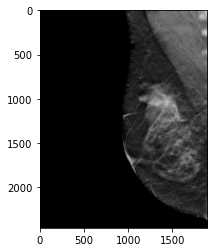

In [45]:
plt.imshow(image[45], cmap=plt.cm.gray);

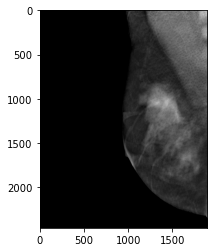

In [39]:
plt.imshow(image[30], cmap=plt.cm.gray);

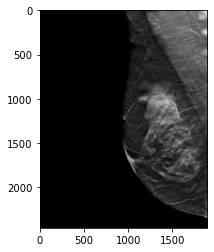

In [43]:
plt.imshow(image[15], cmap=plt.cm.gray);

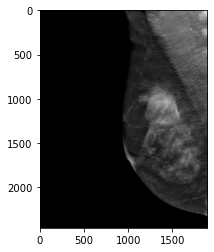

In [44]:
plt.imshow(image[1], cmap=plt.cm.gray);

In [40]:
image.shape

(65, 2457, 1890)

In [41]:
import matplotlib.animation as animation
import ffmpeg

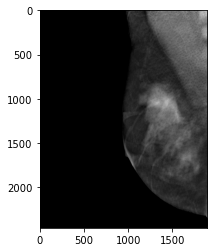

In [42]:
fig = plt.figure()
ims = []
for i in range(image.shape[0]):
    im = plt.imshow(image[i], cmap=plt.cm.gray)
    ims.append([im])
    
ani = animation.ArtistAnimation(fig, ims, interval=200,repeat_delay=1000)

plt.show()


<Figure size 432x288 with 0 Axes>

In [13]:
# response = urllib.request.Request('https://services.cancerimagingarchive.net/services/v4/TCIA/query/getCollectionValues')
# resp = urllib.request.urlopen(response)
# resp_json = json.loads(resp.read())
# df_collections = pd.json_normalize(resp_json)
# df_collections
# mask = ['Breast' in x for x in df_collections['Collection']]
# df_collections[mask]
# response2 = urllib.request.Request('https://services.cancerimagingarchive.net/services/v4/TCIA/query/getPatientStudy?PatientID=DBT-P00029')
# resp2 = urllib.request.urlopen(response)


In [41]:
images = [view_image(df_paths, i) if path_exists(df_paths,i) else np.nan for i,r in df_paths.iterrows() ]

KeyboardInterrupt: 